# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [100]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [6]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [7]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [8]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [9]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [10]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [11]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [12]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [13]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())# Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [14]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())


id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- tenemos las columnas:
    * **city** con **469** datos no identificables o nulos representando el **11.72%** de la informacion total.
    * **churn_date** con **3534** datos no identificables o nulos que representan el **88.35%** de la informacion total.
    * **duration** con **22076** datos no identificables o nulos representan el **55.19%** de la informacion total.
    * **length** con **17896** datos no identificables o nulos representan el **44.74%** de la informacion total.
- Indica qué harías: ¿imputar, eliminar, ignorar?
    *  **city**: se optaría por **ignorar** esta informacion dejando como nulos ya que no deberiamos rellenar datos que no conocemos como la ciudad
    *  **churn_date**: se optaría por **ignorar** la informacion
    *  **lenght** y **duration** al tener un porcentaje alto de nulos se determinaría si **conservar**, **eliminar / despreciar** estos datos si no son necesarios para los stakeholders determinando si analizar la informacion para encontrar outliers y winzorizar dependiendo si los datos no tienen algun sesgo cargado positivamente necesario por su condición.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [15]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` se encuentra a primera vista que la informacion es consistente y **normal**, cercana del rango promedio dentro de valores como 10K y 14k
- La columna `age` muestra registros completos de edades, en promedio de 33 pero se observa **inconsistente** debido a valores minimos incongruentes, requiere de winzorizar o descartar estos casos

In [16]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` presentan informacion completa, la informacion no representan un valor si no un ID
- las columnas de `duration` y `lenght` tienen maximos considerables habría que analizar para descartar outliers y winzorizar de ser necesario

In [17]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` contiene 7 unicas ciudades, la mayoría son Bogotá con 808 del total de informacion de 3531
- La columna `plan` contiene 2 unicos planes, la mayoria son planes basico con 2595 del total de informacion de 4000

In [18]:
# explorar columna categórica de usage
usage['type'].describe()
#usage['type'].unique()

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` tiene 2 unicos datos en la columna, el top es text con 22092 coicnidencias de la totalidad de 40k.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels? en las columnas de `duration`, `lenght`, `city` y `age` se encontro datos faltantes o invalidos asi tambien
- no tenemos estandarizado las columnas del dataset de **users** en cuanto a fechas como las columnas **reg_date** y **churn_date** por el tipo de dato **objeto** mismo caso para el dataset de **usage** con la columna **date**.

- se encuentran columnas preocupantes como city con informacion faltante o que requiere ser analizada, para descartar o eliminar, asi tambien churn_date para saber si despreciar 
- ¿Qué acción tomarías?
primero hay que determinar si despreciar o considerar la informacion, en base a ello se elimina o analiza si existen valores, se estandarizan formatos o tipos de datos, despreciar filas que no contengan datos ya que no podemos rellenar con ciudades o fechas que no son veridicas.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [19]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors= 'coerce')# completa el código

In [20]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'],errors = 'coerce')# completa el código

In [21]:
# Revisar los años presentes en `reg_date` de users
#users['reg_date'].sample(5)
fecha_minima = '2024-01-01'  # Fecha de inicio del servicio
fecha_maxima = '2024-12-31'  # Fecha máxima esperada
# Contar registros fuera del rango lógico
fuera_rango = ((users['reg_date'] < fecha_minima) | (users['reg_date'] > fecha_maxima)).sum()
print("FECHAS FUERA DE RANGO =", fuera_rango)
fechas_minimas = (users['reg_date']<fecha_minima).sum()
fechas_maximas=(users['reg_date']>fecha_maxima).sum()
print("FECHAS MINIMAS =", fechas_minimas)
print("FECHAS MAXIMAS =", fechas_maximas)
print("FECHA MINIMA : ", users['reg_date'].min())
print("FECHA MAXIMA : ", users['reg_date'].max())

FECHAS FUERA DE RANGO = 2670
FECHAS MINIMAS = 2630
FECHAS MAXIMAS = 40
FECHA MINIMA :  2022-01-01 00:00:00
FECHA MAXIMA :  2026-05-10 00:00:00


En `reg_date`, veo 2670 fechas fuera de rango al año 2024, teniendo mas fechas menores al 2024 con 2630

In [22]:
# Revisar los años presentes en `date` de usage
fecha_minima = '2024-01-01'  # Fecha de inicio del servicio
fecha_maxima = '2024-12-31'  # Fecha máxima esperada
# Contar registros fuera del rango lógico
fuera_rango = ((usage['date'] < fecha_minima) | (usage['date'] > fecha_maxima)).sum()
print(fuera_rango)

0


En `date`, no se observan valores fuera del rango del año de 2024.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- aparecen fechas menores a 2024 como del año 2022 y fechas que no debería considerarse como 2026 05 10
- ¿Qué harías con ellas? yo generaría otro dataset llamado clean_date de ambos dataset users y usage, tomando solo fechas dentro del rango requerido de 2024

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [23]:
# Reemplazar -999 por la mediana de age
age_mediana = (pd.to_numeric(users['age'], errors='coerce')).median()
#otra forma sentinel = users['age'].min() <= 0
sentinel=[-999, -1, 0, 999]
users['age'] = users['age'].replace(sentinel, age_mediana)
# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [24]:
# Reemplazar ? por NA en city
sentinel_city = "?"
users['city'] = users['city'].replace(sentinel_city, pd.NA)

# Verificar cambios
#users['city'].describe()
users['city'].unique()

array(['Medellín', <NA>, 'CDMX', 'Bogotá', 'GDL', 'MTY', nan, 'Cali'],
      dtype=object)

In [25]:
# Marcar fechas futuras como NA para reg_date
fecha_maxima = pd.to_datetime('2024-12-31')  # Fecha máxima esperada
users['reg_date'] = pd.to_datetime(users['reg_date'], errors = 'coerce')
users.loc[users['reg_date'] > fecha_maxima, 'reg_date'] = pd.NaT
# Verificar cambios
# Contamos fechas futuras a 2024
fuera_rango = (users['reg_date'] > fecha_maxima).sum()
print("FECHAS MAYORES A 2024=", fuera_rango)

FECHAS MAYORES A 2024= 0


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [26]:
# Verificación MAR en usage (Missing At Random) para duration
print("Proporción de nulos en duration por type:")
duration_missing = usage.groupby('type')['duration'].apply(lambda x: x.isna().mean())
print(duration_missing * 100)

Proporción de nulos en duration por type:
type
call     0.000000
text    99.927576
Name: duration, dtype: float64


In [27]:
# Verificación MAR en usage (Missing At Random) para length
print("\nProporción de nulos en length por type:")
length_missing = usage.groupby('type')['length'].apply(lambda x: x.isna().mean())
print(length_missing * 100)



Proporción de nulos en length por type:
type
call    99.932991
text     0.000000
Name: length, dtype: float64


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

- **Verificacion MAR duration:** nos muestra que tenemos un **99.92%** DE NULOS en **text** ya que estos **mensajes de texto** no tienen una duración, si no una **longitud**

- **Verificacion MAR lenght:** nos muestra que tenemos un **99.93%** DE NULOS en **call** ya que las **llamadas** no tienen una longitud si no una **duración**.

- En ambos no tenemos presentes nulos en donde nos importa que exista informacion, **"minutos"** en las **llamadas** y **"longitud"** en los **mensajes**.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [31]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas

# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_call': 'sum',           # Total de llamadas por usuario
    'is_text': 'sum',          # Duración total por usuario
    'duration': 'sum'
}).reset_index()
# observar resultado
usage_agg.head(3)

,user_id,is_call,is_text,duration
0,10000,3,7,23.70
1,10001,10,5,33.18
2,10002,2,5,10.74


In [33]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'is_call':'cant_mensajes',
    'is_text': 'cant_llamadas',
    'duration': 'cant_minutos_llamada'
})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,3,7,23.70
1,10001,10,5,33.18
2,10002,2,5,10.74


In [62]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(usage_agg, users, on = 'user_id')
user_profile.head(5)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,3,7,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,10,5,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,2,5,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,3,11,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,3,4,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [63]:
# Resumen estadístico de las columnas numéricas
user_profile[['cant_mensajes','cant_llamadas','cant_minutos_llamada']].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,4.478120,5.524381,23.317054
std,2.144238,2.358416,18.168095
min,0.000000,0.000000,0.000000
25%,3.000000,4.000000,11.120000
50%,4.000000,5.000000,19.780000
75%,6.000000,7.000000,31.415000
max,15.000000,17.000000,155.690000


In [64]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize = True)

Basico     0.648662
Premium    0.351338
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

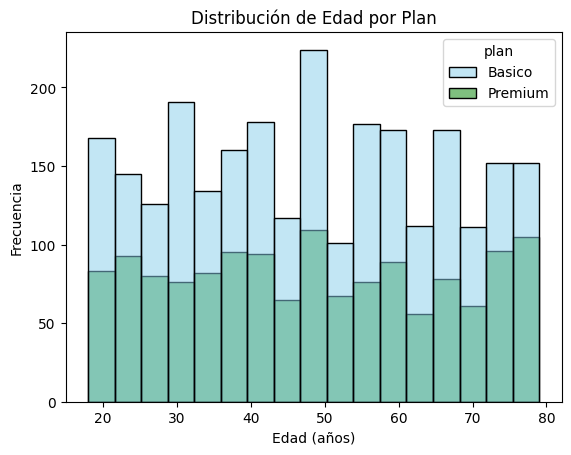

['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date']


In [67]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', hue='plan', 
             palette=['skyblue', 'green'])
plt.title('Distribución de Edad por Plan')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()
print(user_profile.columns.tolist())

💡Insights: 
- Distribución observamos que se distribuye la informacion de manera normal debido a la forma de la grafica ya que en ambos sentidos desde el punto medio encontramos datos distribuidos como campana, sin embargo existen puntos donde la cantidad se ve menor a comparacion de otras

Text(0, 0.5, 'Frecuencia')

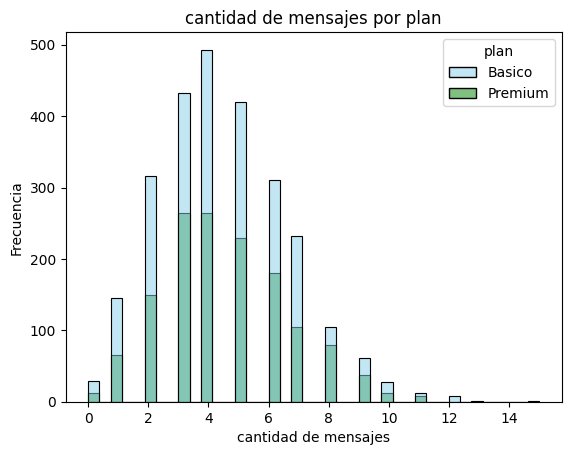

In [72]:
# Histograma para visualizar la cant_mensajes

sns.histplot(data=user_profile, x='cant_mensajes',hue='plan',
            palette=['skyblue','green'])
plt.title('cantidad de mensajes por plan')
plt.xlabel('cantidad de mensajes')
plt.ylabel('Frecuencia')


💡Insights: 
- Observamos un sesgo postivo a la derecha, nos indica que puede existir outliers

Text(0, 0.5, 'Frecuencia')

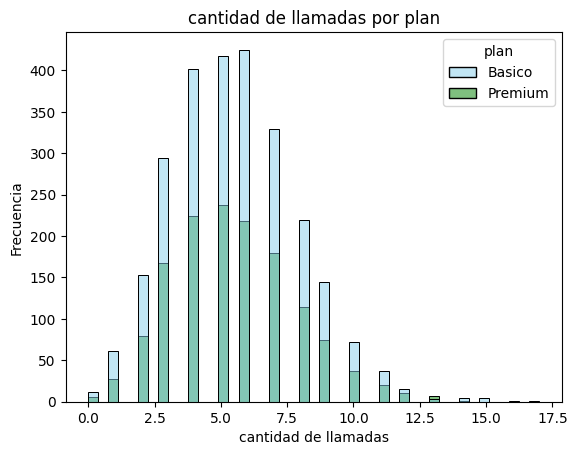

In [74]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas',hue='plan',
            palette=['skyblue','green'])
plt.title('cantidad de llamadas por plan')
plt.xlabel('cantidad de llamadas')
plt.ylabel('Frecuencia')

💡Insights: 
- Distribución sesgada a la derecha podemos observar que existen outliers

Text(0, 0.5, 'Frecuencia')

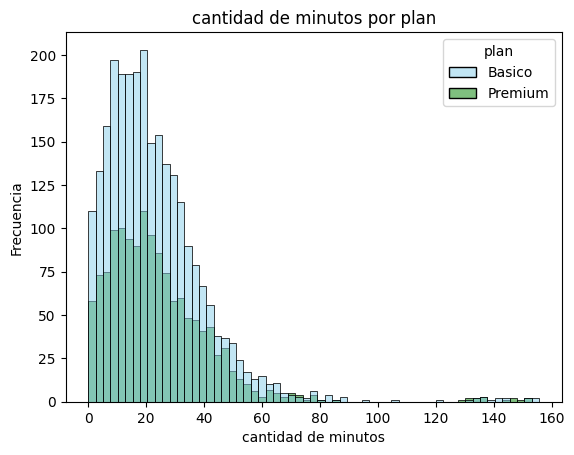

In [76]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada',hue='plan',
            palette=['skyblue','green'])
plt.title('cantidad de minutos por plan')
plt.xlabel('cantidad de minutos')
plt.ylabel('Frecuencia')


💡Insights: 
- observamos outliers considerables con sesgo postivo a la derecha

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

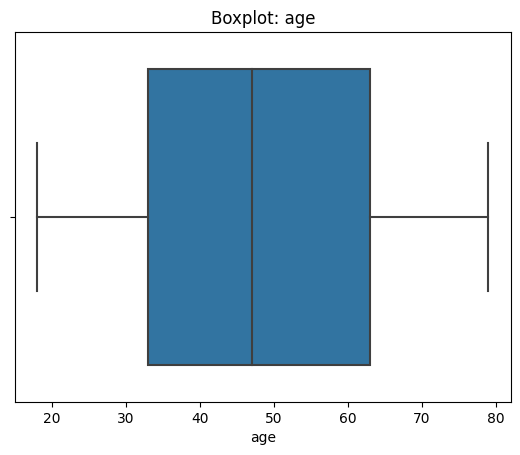

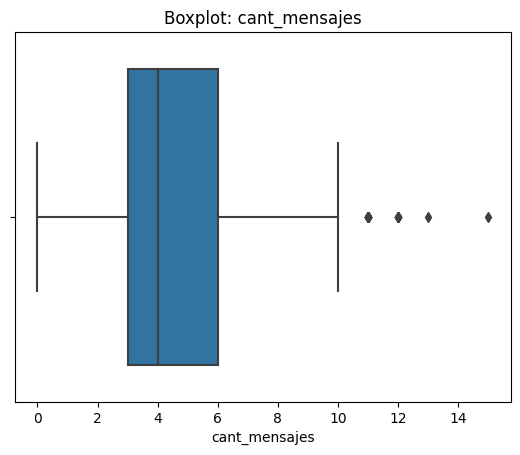

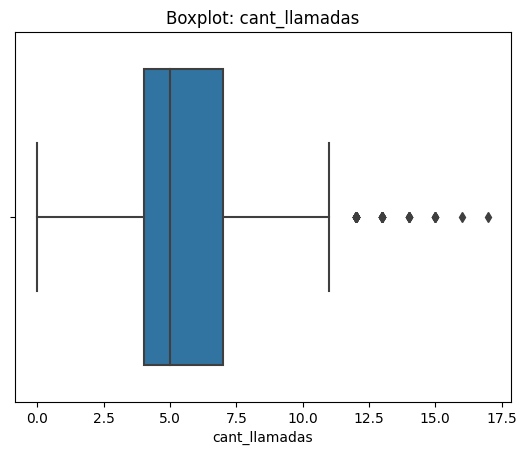

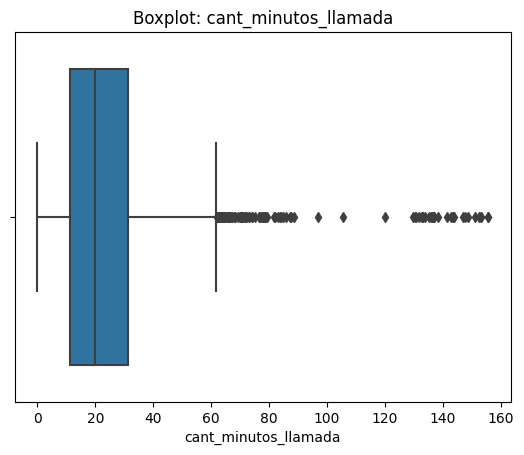

In [85]:
# Visualizando usando BoxPlot 

columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.title(f'Boxplot: {col}')
    sns.boxplot(user_profile[col])
    plt.show()

💡Insights: 
- Age: no presenta outliers
- cant_mensajes: presenta outliers
- cant_llamadas: presenta outliers a la derecha o positivos
- cant_minutos_llamada: presenta outliers considerables a la derecha

In [95]:
# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)  # Primer cuartil
    Q3 = user_profile[col].quantile(0.75)  # Tercer cuartil
    # 2. Calcular el IQR
    IQR = Q3 - Q1
    # 3.límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    print("IQR en:", col)
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'Límite inferior: {limite_inferior}')
    print(f'Límite superior: {limite_superior}')
    print("")

IQR en: age
Q1: 33.0
Q3: 63.0
IQR: 30.0
Límite inferior: -12.0
Límite superior: 108.0

IQR en: cant_mensajes
Q1: 3.0
Q3: 6.0
IQR: 3.0
Límite inferior: -1.5
Límite superior: 10.5

IQR en: cant_llamadas
Q1: 4.0
Q3: 7.0
IQR: 3.0
Límite inferior: -0.5
Límite superior: 11.5

IQR en: cant_minutos_llamada
Q1: 11.12
Q3: 31.415
IQR: 20.295
Límite inferior: -19.322500000000005
Límite superior: 61.8575



In [96]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000,3999.000000
mean,48.124531,4.478120,5.524381,23.317054
std,17.692032,2.144238,2.358416,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,4.000000,11.120000
50%,47.000000,4.000000,5.000000,19.780000
75%,63.000000,6.000000,7.000000,31.415000
max,79.000000,15.000000,17.000000,155.690000


💡Insights: 
- cant_mensajes: debemos manener la cantidad de outliers ya que son un numero positivo que es veridico o podria analizarse mas a profundidad segmentando el caso
- cant_llamadas: se debe mantener outliers ya que tenemos sesgo positivo y podriamos segmentar a los clientes dependiendo del plan para analizar mas a fondo
- cant_minutos_llamada: se debe mantener outliers ya que tenemos sesgo positivo y podriamos segmentar a los clientes dependiendo del plan para analizar mas a fondo o determinar si winsorizar

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [101]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = np.where(
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5), 'Bajo uso',
     np.where((user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes']< 10), 'Uso medio', 'Alto uso'))

In [102]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso
0,10000,3,7,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio
1,10001,10,5,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso
2,10002,2,5,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio
3,10003,3,11,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso
4,10004,3,4,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [103]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = np.where(
    (user_profile['age'] < 30), 'Joven',
     np.where((user_profile['age'] < 60), 'Adulto', 'Adulto Mayor'))

In [110]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso,grupo_edad
0,10000,3,7,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio,Adulto
1,10001,10,5,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso,Adulto
2,10002,2,5,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio,Adulto
3,10003,3,11,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso,Adulto Mayor
4,10004,3,4,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

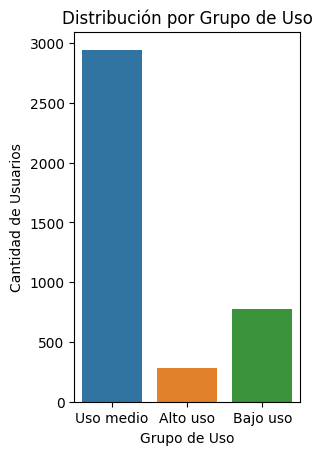

In [116]:
# Visualización de los segmentos por uso
plt.subplot(1, 2, 1)
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribución por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()

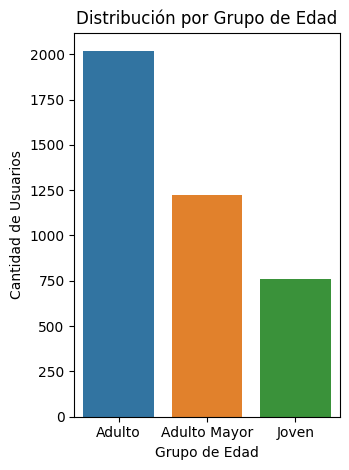

In [117]:
# Visualización de los segmentos por edad
plt.subplot(1, 2, 2)
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Distribución por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')

plt.tight_layout()
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
los datos de fehca tenian tipo de dato como objeto y se opto por dar formato de fecha
los valores negativos en edad se opto por reemplazar por la mediana.
los valores nulos o no identificables se opto por despreciar como el caso de ciudad y fecha de churn pues son datos que no se deberian rellenar porque si.
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  identificamos segmentos de clientes con uso medio para gran parte de la totalidad y su comportamiento por edad nos reflejaba que la mayor parte pertenecian a adultos, despues a jovenes y al final a adulto mayor, aunque la cantidad de jovenes fuera menor en comparacion con adultos o adultos mayores.

- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?
- el segmento de uso medio para adultos resultaría ser mas valioso por la cantidad de usuarios
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
se encontraron patrones de alto uso en los minutos de llamadas con aprox 1 hr esto implicaría mejor uso de llamadas en lugar de texto 

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
se recomendaría aumentar la cantidad de minutos en los planes, para mejorar de uso medio a alto uso en la poblacion adulta ya que compone la gran mayoría e incentivar a los jovenes y adultos mayores con planes que ofrezcan mayor numero de llamadas y mensajes de texto
✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- tipo de dato como objeto en fecha
- valores negativos en edad
- valores nulos o no identificables como el caso de ciudad y fecha de churn.

🔍 **Segmentos por Edad**
- Adulto
- Adulto Mayor
- Joven


📊 **Segmentos por Nivel de Uso**
- Uso medio
- Uso alto
- Uso Bajo


➡️ Esto sugiere que
la cantidad de minutos en las llamadas y cantidad de mensajes de texto, puede aumentar de uso medio a alto uso en la poblacion adulta si se promueve planes con mejores coberturas o llamadas y mensajes ilimitados

💡 **Recomendaciones**
- incentivar a la poblacion joven y adulto mayor con planes mas llamativos a su edad y necesidades con planes ilimitados o con servicios adicionales

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`